# Earth Analytics Bootcamp - Practice Activity on Data Structures
**Author:** J Balachowski

## Q2. Import Packages

In [1]:
# import packages
import os
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# print success message after import
print("import successful")

import successful


In [5]:
# set working directory
os.chdir("/Users/jenniferbalachowski/earth-analytics-bootcamp/")

# check directory
os.getcwd()

'/Users/jenniferbalachowski/earth-analytics-bootcamp'

# Q3. Create List of Data Values

In [8]:
# list of monthly mean temps for Boulder, CO
temp = [0.0, 2.00, 5.0, 9.56, 14.39, 21.72, 16.72, 11.61, 4.89, 0.99]

print(temp)

[0.0, 2.0, 5.0, 9.56, 14.39, 21.72, 16.72, 11.61, 4.89, 0.99]


# Q4. Insert Missing Values Into List

In [10]:
# insert missing values for Jun and Jul with listname.insert(index, value)
temp.insert(5, 19.56)
temp.insert(6, 22.78)
print(temp)

[0.0, 2.0, 5.0, 9.56, 14.39, 19.56, 22.78, 19.56, 22.78, 21.72, 16.72, 11.61, 4.89, 0.99]


## Q5. Create Array of Temp

In [21]:
# create array of temp data
temp_array = np.array(temp)
temp_array

array([ 0.  ,  2.  ,  5.  ,  9.56, 14.39, 19.56, 22.78, 19.56, 22.78,
       21.72, 16.72, 11.61,  4.89,  0.99])

## Q6. Download Text File and Import Into Arrays

In [25]:
# import data data 
urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12732467",
                          filename = "data/avg-monthly-temp.txt")


print("data imported successfully")

data imported successfully


In [32]:
# import data to array
avg_monthly_temp = np.loadtxt(fname = "/Users/jenniferbalachowski/earth-analytics-bootcamp/data/avg-monthly-temp.txt")

print(avg_monthly_temp)
print(avg_monthly_temp.shape)

[ 0.    2.    5.    9.56 14.39 19.56 22.78 21.72 16.72 11.61  4.89  0.99]
(12,)


## Q7. Select, Summarize Array Data

In [38]:
# array for Mar, Apr, May
spring_temp = avg_monthly_temp[2:5, ]

# mean of Spring monthly temperatures
mean_spring_temp = np.mean(spring_temp)
print("Mean of spring monthly temps:", mean_spring_temp)

# array for Sept, Oct, Nov
autumn_temp = avg_monthly_temp[8:11, ]

# mean of Autumn monthly temps
mean_autumn_temp = np.mean(autumn_temp)
print("Mean of autumn monthly temps:", mean_autumn_temp)

Mean of spring monthly temps: 9.65
Mean of autumn monthly temps: 11.073333333333332


## Manually Create Dataframes

In [42]:
# manually create dataframe of temp and month
avg_temp_month = pd.DataFrame(columns=["month", "temp"], data=[["Jan", 0.00], 
                              ["Feb", 2.00], ["Mar", 5.00], ["Apr", 9.56]])
avg_temp_month

,month,temp
0,Jan,0.00
1,Feb,2.00
2,Mar,5.00
3,Apr,9.56


## Q9. Download CSV to DF`

In [43]:
# import data data 
urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12739457",
                          filename = "data/avg-temp-months-seasons.csv")


print("data imported successfully")

data imported successfully


In [67]:
# import data to dataframe
temp_month_season = pd.read_csv("/Users/jenniferbalachowski/earth-analytics-bootcamp/data/avg-temp-months-seasons.csv")

# print type
print(type(temp_month_season))

# print df
temp_month_season

<class 'pandas.core.frame.DataFrame'>


,months,temp,seasons
0,Jan,0.00,Winter
1,Feb,2.00,Winter
2,Mar,5.00,Spring
3,Apr,9.56,Spring
4,May,14.39,Spring
5,June,19.56,Summer
6,July,22.78,Summer
7,Aug,21.72,Summer
8,Sept,16.72,Fall
9,Oct,11.61,Fall


## Q10. Select and Summarize df Data

In [68]:
# new df for each season
winter_temp = temp_month_season[temp_month_season.seasons == "Winter"]
spring_temp = temp_month_season[temp_month_season.seasons == "Spring"]
summer_temp = temp_month_season[temp_month_season.seasons == "Summer"]
fall_temp = temp_month_season[temp_month_season.seasons == "Fall"]

# summarise all dfs
winter_temp.describe()

,temp
count,3.000000
mean,0.996667
std,1.000017
min,0.000000
25%,0.495000
50%,0.990000
75%,1.495000
max,2.000000


In [69]:
# summarise all dfs
spring_temp.describe()

,temp
count,3.000000
mean,9.650000
std,4.695647
min,5.000000
25%,7.280000
50%,9.560000
75%,11.975000
max,14.390000


In [70]:
# summarise all dfs
summer_temp.describe()

,temp
count,3.000000
mean,21.353333
std,1.641016
min,19.560000
25%,20.640000
50%,21.720000
75%,22.250000
max,22.780000


In [71]:
# summarise all dfs
fall_temp.describe()

,temp
count,3.000000
mean,11.073333
std,5.933231
min,4.890000
25%,8.250000
50%,11.610000
75%,14.165000
max,16.720000


## Q11. Plot Data from df``

In [76]:
# mean of each season
mean_temp_season = pd.DataFrame(columns=["season", "mean_temp"], data=[["Winter", np.mean(winter_temp.temp)], 
                              ["Spring", np.mean(spring_temp.temp)], ["Summer", np.mean(summer_temp.temp)], ["Fall", np.mean(winter_temp.temp)]])

mean_temp_season

,season,mean_temp
0,Winter,0.996667
1,Spring,9.650000
2,Summer,21.353333
3,Fall,0.996667


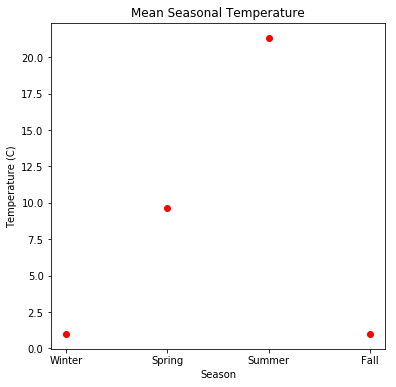

In [83]:
# set plot size for all plots that follow
plt.rcParams["figure.figsize"] = (6, 6)

# create the plot space upon which to plot the data
fig, ax = plt.subplots()

# add the x-axis and the y-axis to the plot
ax.scatter(mean_temp_season.season, mean_temp_season.mean_temp, color="red")

# set plot title
ax.set(title="Mean Seasonal Temperature")

# add labels to the axes
ax.set(xlabel="Season", ylabel="Temperature (C)");